In [2]:
import keras
import numpy
import tensorflow as tf
import matplotlib.pyplot as plt


#importing the datasets

In [3]:
seed=67
image_size=(256,256)
batch_size=16

training_dataset = keras.utils.image_dataset_from_directory(
            directory="/content/drive/MyDrive/hematologie/",
            validation_split=0.2,
            subset="training",
            seed=seed,
            image_size=image_size,
            batch_size=batch_size,
            label_mode="binary"
)

testing_dataset = keras.utils.image_dataset_from_directory(
            directory="/content/drive/MyDrive/hematologie/",
            validation_split=0.2,
            subset="validation",
            seed=seed,
            image_size=image_size,
            batch_size=batch_size,
            label_mode="binary"
)


Found 20721 files belonging to 2 classes.
Using 16577 files for training.
Found 20721 files belonging to 2 classes.
Using 4144 files for validation.


#data augmentation


In [4]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [5]:
training_dataset = training_dataset.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

#normalising the data

In [8]:
norm_train_dataset = training_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))
norm_test_dataset   = testing_dataset.map(lambda x, y: (tf.cast(x, tf.float32) / 255.0, y))


#representing a sample of the augmented data

In [6]:
for images, labels in training_dataset.take(1):
    print(images.shape, images.dtype)
    print(labels.shape, labels)


(16, 256, 256, 3) <dtype: 'float32'>
(16, 1) tf.Tensor(
[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]], shape=(16, 1), dtype=float32)


representing the images in a 3x3 grid

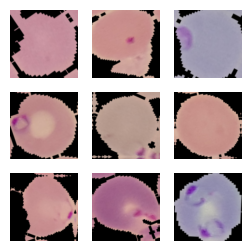

In [9]:
plt.figure(figsize=(3,3))
for counter in range(9):
    plt.subplot(3, 3, counter + 1)  # 3x3 grid of images
    plt.imshow(images[counter].numpy().astype("uint8"))  # Convert tensor to numpy and display
    plt.axis("off")
plt.show()


#the cnn model

In [10]:
the_cnn= keras.Sequential([
    keras.Input(shape=(256,256,3)),


    keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2)),

    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D(pool_size=(2,2)),


    keras.layers.Flatten(),

    keras.layers.Dense(units=128 , activation="relu"),
    keras.layers.Dense(1 , activation="sigmoid"),
])

In [11]:
the_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,509,697 (120.20 MB)

 Trainable params: 31,509,697 (120.20 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
the_cnn.compile(loss="binary_crossentropy",optimizer="Adam")

#fitting the model

In [ ]:
the_cnn.fit(norm_train_dataset,batch_size=16,epochs=10)

Epoch 1/10
 432/1037 ━━━━━━━━━━━━━━━━━━━━ 29:17 3s/step - loss: 0.9013